# Q2

## Import dependencies

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

## Define functions

In [70]:
def resize(image, size):
  '''
    calculate the resized image
    input(s):
      image (ndarray): input image
      size (tuple): size of output image
    output(s):
      images (ndarray): the resized image
  '''
  
  resized_image = cv2.resize(image, size,interpolation= cv2.INTER_NEAREST)

  return resized_image

def crop(image, MainSize, CropSize):
  '''
    calculate the cropped images
    input(s):
      image (ndarray): input image
      MainSize (tuple): size of input image
      CropSize (tuple): size of output image
    output(s):
      images (ndarray): the cropped images
  '''
  # note that your output should be 1100 number of images
  # so you should not save the images that all their pixels have a value of zero
  # hint : you can sum all the pixels for each cropped image with numpy
  images = [] 
  M = CropSize[0]
  N = CropSize[1]
  x1 = 0
  y1 = 0
  imgheight= MainSize[0]
  imgwidth= MainSize[1]
  image_copy = image.copy()
  for y in range(0, imgheight, M):
    for x in range(0, imgwidth, N):
        if (imgheight - y) < M or (imgwidth - x) < N:
            break
        y1 = y + M
        x1 = x + N
        if x1 >= imgwidth and y1 >= imgheight:
            x1 = imgwidth - 1
            y1 = imgheight - 1

            tiles = image_copy[y:y+M, x:x+N]
            
        elif y1 >= imgheight: 
            y1 = imgheight - 1

            
            tiles = image_copy[y:y+M, x:x+N]
           
        elif x1 >= imgwidth: 
            x1 = imgwidth - 1
          
            tiles = image_copy[y:y+M, x:x+N]
           
        else:
            
            tiles = image_copy[y:y+M, x:x+N]
        if np.sum(tiles) != 0:
           images.append(tiles)

        

  return images

## Read the images

In [44]:
# read the images with opencv from Q2_images directory and add them to images array
images_path = ["usps_1.jpg","usps_2.jpg","usps_3.jpg","usps_4.jpg","usps_5.jpg"]
images = []
for i in images_path:
  image = cv2.imread(f"Q2_images\\{i}", 0)
  images.append(image)
  assert image.shape == (544,528)
assert len(images) == 5

## Crop the images

In [45]:
All_cropped_images = []
for img in images:
  MainSize = img.shape
  CropSize = (16,16)
  cropped_images = crop(img,MainSize,CropSize)
  All_cropped_images.append(cropped_images)

assert len(All_cropped_images) == 5
assert len(All_cropped_images[0]) == 1100
assert All_cropped_images[0][0].shape == (16,16)

## Resize and show images

in this section you should show 4 random images with size (50,50) for each number :
1.   select a random number with numpy library
2.   pick an image with that random number
3.   resize the image to (50,50) with resize function
4.   show the image with matplotlib library
5.   repeat the above steps 4 times for each number


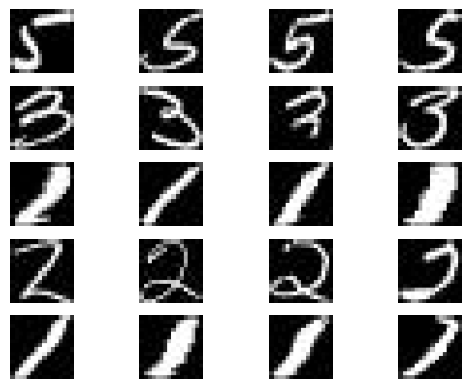

In [75]:

random_numbers = np.random.randint(5, size=5) 
image_arrays = []

for num in random_numbers: 
    image = images_path[num]
    cropped_image = All_cropped_images[num]
    indexes = np.random.randint(len(cropped_image), size=4)
    
    for i in indexes:
        selected_image =  cropped_image[i]
        resized_image = resize(selected_image, (50,50))
        image_arrays.append(resized_image)


fig = plt.figure()
for i in range(20): 
    fig.add_subplot(5, 4, i+1)
    plt.imshow(image_arrays[i] , cmap = 'gray')
    plt.axis('off')


